

# Connect with Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.interpolate import interp1d
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn import preprocessing
from sklearn.preprocessing import normalize

# Loading Data

In [ ]:
path = "drive/MyDrive/Cog_DataSets/testing/"
test_acc = np.load(path+"testAccelerometer.npy")
test_grav = np.load(path+"testGravity.npy")
test_gyro = np.load(path+"testGyroscope.npy")
test_jinsAcc = np.load(path+"testJinsAccelerometer.npy")
test_jinsGyro = np.load(path+"testJinsGyroscope.npy")
test_Label =np.load(path+"testLabels.npy")
test_linAcc = np.load(path+"testLinearAcceleration.npy")
test_MsAcc = np.load(path+"testMSAccelerometer.npy")
test_MsGyro = np.load(path + "testMSGyroscope.npy")
test_MsMag = np.load(path+"testMagnetometer.npy")
# test_acc

path = "drive/MyDrive/Cog_DataSets/training/"
train_acc = np.load(path+"trainAccelerometer.npy")
train_grav = np.load(path+"trainGravity.npy")
train_gyro = np.load(path+"trainGyroscope.npy")
train_jinsAcc = np.load(path+"trainJinsAccelerometer.npy")
train_jinsGyro = np.load(path+"trainJinsGyroscope.npy")
train_Label =np.load(path+"trainLabels.npy")
train_linAcc = np.load(path+"trainLinearAcceleration.npy")
train_MsAcc = np.load(path+"trainMSAccelerometer.npy")
train_MsGyro = np.load(path + "trainMSGyroscope.npy")
train_MsMag = np.load(path+"trainMagnetometer.npy")
train_Label

array([47, 47, 22, ..., 33, 29, 28])

In [ ]:
np.shape(train_acc) # shape=(2284, 800, 3)
# np.shape(train_gyro) #shape=(2284, 800, 3)
# np.shape(train_grav) #shape=(2284, 800, 3)
# np.shape(train_jinsAcc) #shape=(2284, 80, 3)
# np.shape(train_jinsGyro) #shape=(2284, 80, 3)
# np.shape(train_Label) #shape=(2284)
# np.shape(train_linAcc) #shape=(2284, 800, 3)
# np.shape(train_MsAcc) #shape=(2284, 268, 3)
# np.shape(train_MsGyro) #shape=(2284, 268, 3)
# np.shape(train_MsMag) #shape=(2284, 200, 3)

np.shape(test_MsAcc)

(2288, 268, 3)

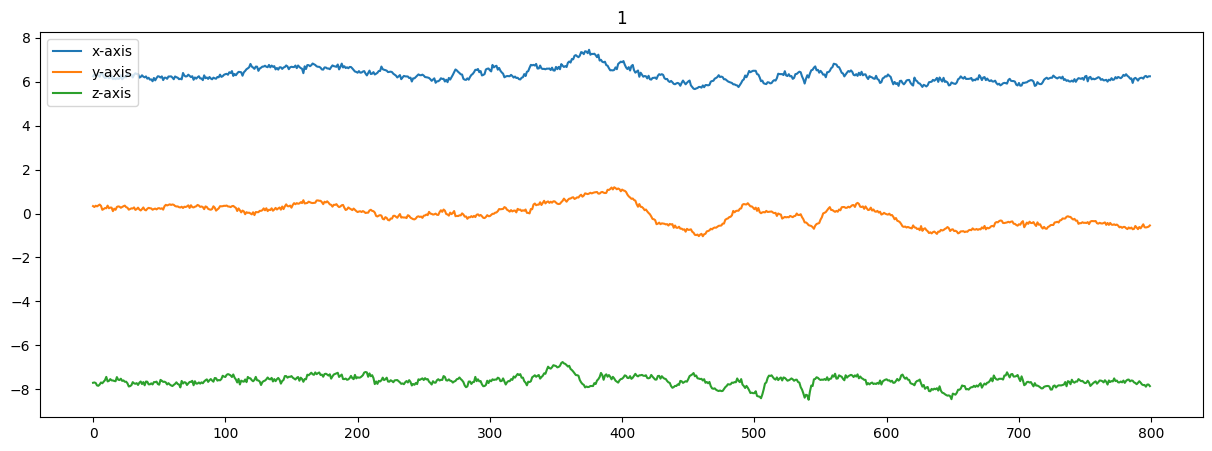

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))
axs.plot(train_acc[100][:])
plt.legend(['x-axis', 'y-axis', 'z-axis'], loc="upper left")
plt.title(train_Label[100])
# axs[1].plot(train_MsAcc[0][:])
# plt.legend(['x-axis', 'y-axis', 'z-axis'], loc="upper left")
# axs[2].plot(train_jinsAcc[0][:])
# plt.legend(['x-axis', 'y-axis', 'z-axis'], loc="upper left")
plt.show()

(2284, 268, 3)


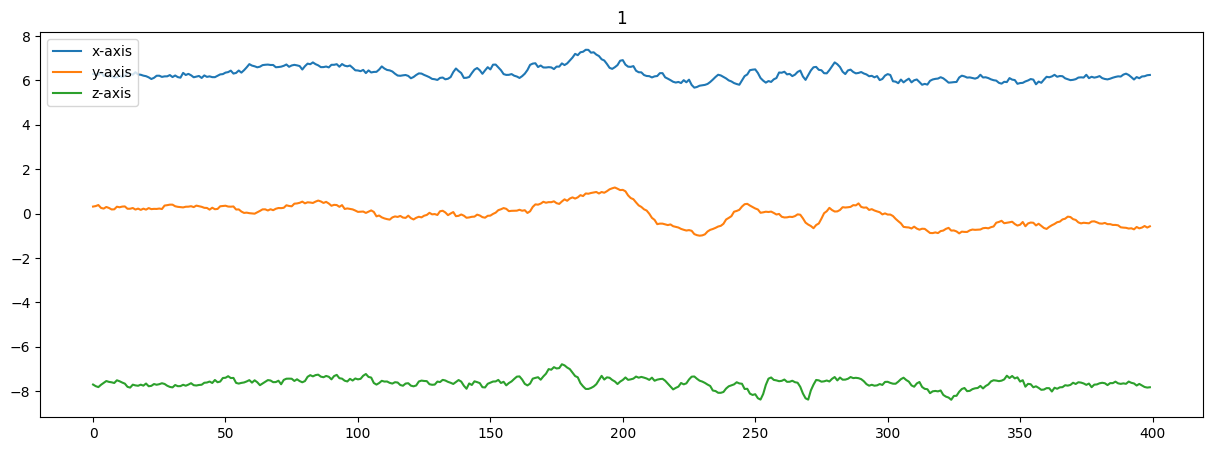

In [ ]:
import numpy as np
from scipy.ndimage import zoom

# load your data here and assign it to variable data

# calculate the zoom factor for each dimension
zoom_factor = (1, 268/80, 1)

# upsample the data using the zoom function
upsampled_data = zoom(train_jinsGyro, zoom_factor)

# print the shape of the upsampled data
print(upsampled_data.shape)

upsampled_dataMS = np.repeat(train_MsAcc, 2, axis=1)

from scipy.ndimage import zoom
from skimage.measure import block_reduce

# Assuming the array is called "sensor_data"
downsampled_data = block_reduce(train_acc, block_size=(1, 2, 1), func=np.mean)



fig, axs = plt.subplots(1, 1, figsize=(15, 5))
axs.plot(downsampled_data[100][:])
plt.legend(['x-axis', 'y-axis', 'z-axis'], loc="upper left")
plt.title(train_Label[100])
# axs[1].plot(train_MsAcc[0][:])
# plt.legend(['x-axis', 'y-axis', 'z-axis'], loc="upper left")
# axs[2].plot(train_jinsAcc[0][:])
# plt.legend(['x-axis', 'y-axis', 'z-axis'], loc="upper left")
plt.show()

# Reshape and stack Data Before Fitting to Model

In [ ]:
from scipy.ndimage import zoom
from skimage.measure import block_reduce
from skimage.transform import resize

train_acc_reshaped = block_reduce(train_acc, block_size=(1, 2, 1), func=np.mean)
train_gyro_reshaped = block_reduce(train_gyro, block_size=(1, 2, 1), func=np.mean)
train_grav_reshaped = block_reduce(train_grav, block_size=(1, 2, 1), func=np.mean)
train_linAcc_reshaped = block_reduce(train_linAcc, block_size=(1, 2, 1), func=np.mean)
train_MsAcc_reshaped = resize(train_MsAcc, (2284, 400, 3), mode='edge')
train_MsGyro_reshaped = resize(train_MsGyro, (2284, 400, 3), mode='edge')
train_MsMag_reshaped = np.repeat(train_MsMag, 2, axis=1)
train_jinsAcc_reshaped = np.repeat(train_jinsAcc, 5, axis=1)
train_jinsGyro_reshaped = np.repeat(train_jinsGyro, 5, axis=1)

In [ ]:
test_acc_reshaped = block_reduce(test_acc, block_size=(1, 2, 1), func=np.mean)
test_gyro_reshaped = block_reduce(test_gyro, block_size=(1, 2, 1), func=np.mean)
test_grav_reshaped = block_reduce(test_grav, block_size=(1, 2, 1), func=np.mean)
test_linAcc_reshaped = block_reduce(test_linAcc, block_size=(1, 2, 1), func=np.mean)
test_MsAcc_reshaped = resize(test_MsAcc, (2288, 400, 3), mode='edge')
test_MsGyro_reshaped = resize(test_MsGyro, (2288, 400, 3), mode='edge')
test_MsMag_reshaped = np.repeat(test_MsMag, 2, axis=1)
test_jinsAcc_reshaped = np.repeat(test_jinsAcc, 5, axis=1)
test_jinsGyro_reshaped = np.repeat(test_jinsGyro, 5, axis=1)

In [ ]:
train_acc_reshaped = np.append(train_acc_reshaped,test_acc_reshaped, axis=0)
train_gyro_reshaped = np.append(train_gyro_reshaped,test_gyro_reshaped, axis=0)
train_grav_reshaped = np.append(train_grav_reshaped,test_grav_reshaped, axis=0)
train_linAcc_reshaped = np.append(train_linAcc_reshaped,test_linAcc_reshaped, axis=0)
train_MsAcc_reshaped = np.append(train_MsAcc_reshaped,test_MsAcc_reshaped, axis=0)
train_MsGyro_reshaped = np.append(train_MsGyro_reshaped,test_MsGyro_reshaped, axis=0)
train_MsMag_reshaped = np.append(train_MsMag_reshaped,test_MsMag_reshaped, axis=0)
train_jinsAcc_reshaped = np.append(train_jinsAcc_reshaped,test_jinsAcc_reshaped, axis=0)
train_jinsGyro_reshaped = np.append(train_jinsGyro_reshaped,test_jinsGyro_reshaped, axis=0)

In [ ]:
print("Shape of all sensors after up/down sample... ", train_acc_reshaped.shape, train_gyro_reshaped.shape, train_grav_reshaped.shape, train_linAcc_reshaped.shape
                       , train_MsAcc_reshaped.shape, train_MsGyro_reshaped.shape, train_MsMag_reshaped.shape,
                       train_jinsAcc_reshaped.shape, train_jinsGyro_reshaped.shape)

Shape of all sensors after up/down sample...  (4572, 400, 3) (4572, 400, 3) (4572, 400, 3) (4572, 400, 3) (4572, 400, 3) (4572, 400, 3) (4572, 400, 3) (4572, 400, 3) (4572, 400, 3)


In [ ]:
all_data = np.stack([train_acc_reshaped, train_gyro_reshaped, train_grav_reshaped, train_linAcc_reshaped
                       , train_MsAcc_reshaped, train_MsGyro_reshaped, train_MsMag_reshaped,
                       train_jinsAcc_reshaped, train_jinsGyro_reshaped], axis=-1)

all_Label = np.append(train_Label, test_Label, axis=-1)

In [ ]:
# 70% training data + labels
train_data = all_data[: int(all_data.shape[0]*0.7)]
# 30% testing data + labels
test_data = all_data[int(all_data.shape[0]*0.7):]
train_labels = all_Label[: int(all_Label.shape[0]*0.7)]
test_labels = all_Label[int(all_Label.shape[0]*0.7):]

In [ ]:
print("\nShape of training and testin data + labels...\n")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)


Shape of training and testin data + labels...

(3200, 400, 3, 9) (1372, 400, 3, 9)
(3200,) (1372,)


In [ ]:
from sklearn.model_selection import train_test_split

# Assume your sensor data is stored in a NumPy array called `data` with shape (n_samples, 2284, 800, 3)
# Assume your labels are stored in a NumPy array called `labels` with shape (n_samples, num_classes)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)


# x_train = np.stack([train_acc, train_gyro, train_grav, train_linAcc], axis=-1)

print("Shape of training + validation Data")
print(np.shape(x_train), np.shape(y_train))

Shape of training + validation Data
(2560, 400, 3, 9) (2560,)


In [ ]:
import tensorflow as tf
from keras.optimizers import Adam
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


In [ ]:


y_train = to_categorical(y_train, num_classes=55)
y_val = to_categorical(y_val, num_classes=55)


print("Shape of training + validation Labels")
print(np.shape(y_train), np.shape(y_val))

Shape of training + validation Labels
(2560, 55) (640, 55)


# TensorFlow

In [ ]:
# Filter parameters, i.e. about the number of inputs processed by each neuron of the convolutional layer
filter1Size = (11,1)
filter2Size = (13,1)
filter3Size = (13,1)

# Downsampling factors of the pooling layers
poolingLayer1Factor = (2,1)
poolingLayer2Factor = (3,1)
poolingLayer3Factor = (2,1)

# Number of feature maps processed by each convolutional layer
nbFeaturesLayer1 = 50
nbFeaturesLayer2 = 40
nbFeaturesLayer3 = 30

# Activation function of the convolutional layer(s)
activationConv = 'relu'

# Parameters of the dense layer
activationMLP = 'relu'
inputMLP = 500

# Training parameters
batchSize = 400
numberOfEpochs = 50
learningRate = 0.005


In [ ]:
def normConv1(
    inputShape,
    nkerns,
    filterSizes,
    poolSizes,
    activationConv,
    inputMLP,
    activationMLP,
    nbClasses,
    withSoftmax=True):

    model = Sequential()

    model.add(BatchNormalization(input_shape=inputShape))

    # 1st convolutional + pooling + normalization layer
    model.add(Conv2D(nkerns[0], kernel_size=filterSizes[0], activation=activationConv))
    model.add(MaxPooling2D(pool_size=poolSizes[0]))

    # Fully-connected layer
    model.add(Flatten())
    model.add(Dense(inputMLP, activation=activationMLP))

    # Softmax layer
    if withSoftmax:
        model.add(Dense(nbClasses, activation='softmax'))

    # Return the model
    return model

In [ ]:
model = normConv1(
    inputShape=(400,3,9),
    nkerns=[nbFeaturesLayer1, nbFeaturesLayer2, nbFeaturesLayer3],
    filterSizes=[filter1Size, filter2Size, filter3Size],
    poolSizes=[poolingLayer1Factor, poolingLayer2Factor, poolingLayer3Factor],
    activationConv='relu',
    inputMLP=inputMLP,
    activationMLP=activationMLP,
    nbClasses=55,
    withSoftmax=True)

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=numberOfEpochs,
    batch_size=batchSize
)


Epoch 1/50
7/7 [==============================] - 17s 2s/step - loss: 9.3969 - accuracy: 0.0543 - val_loss: 14.5878 - val_accuracy: 0.1047
Epoch 2/50
7/7 [==============================] - 16s 2s/step - loss: 5.2310 - accuracy: 0.2016 - val_loss: 6.9365 - val_accuracy: 0.1031
Epoch 3/50
7/7 [==============================] - 16s 2s/step - loss: 3.5472 - accuracy: 0.2797 - val_loss: 3.7411 - val_accuracy: 0.2516
Epoch 4/50
7/7 [==============================] - 16s 2s/step - loss: 2.4871 - accuracy: 0.4066 - val_loss: 2.8779 - val_accuracy: 0.3094
Epoch 5/50
7/7 [==============================] - 16s 2s/step - loss: 1.8614 - accuracy: 0.5125 - val_loss: 2.4351 - val_accuracy: 0.3469
Epoch 6/50
7/7 [==============================] - 15s 2s/step - loss: 1.4685 - accuracy: 0.6113 - val_loss: 2.3140 - val_accuracy: 0.3922
Epoch 7/50
7/7 [==============================] - 15s 2s/step - loss: 1.1669 - accuracy: 0.6945 - val_loss: 2.2672 - val_accuracy: 0.3969
Epoch 8/50
7/7 [=================

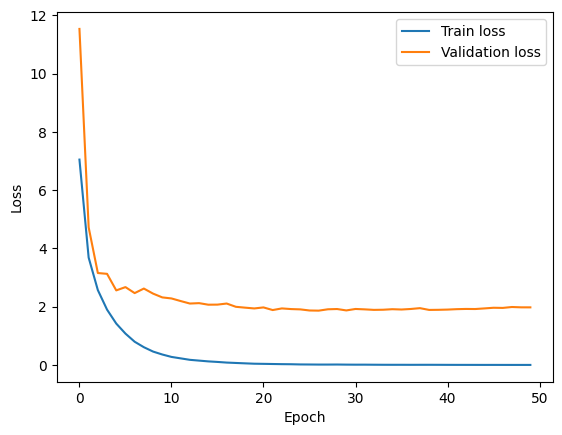

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# plot the graph
plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
estimatedLabels = np.argmax(model.predict(test_data),axis=-1)
estimatedLabels = estimatedLabels.flatten()

accuracy = accuracy_score(test_labels,estimatedLabels)
weightedF1 = f1_score(test_labels,estimatedLabels,average='weighted')
averageF1 = f1_score(test_labels,estimatedLabels,average='macro')
#confMat = confusion_matrix(testingLabels,estimatedLabels,labels=labelsTable.values())
allF1Scores = f1_score(test_labels,estimatedLabels,average=None)

# Print results
print('   Test accuracy = %.2f %%' % (accuracy*100))
print('   Weighted F1-score = %.4f' % (weightedF1))
print('   Average F1-score = %.4f' % (averageF1))
# print('   All F1-scores:')
# print(allF1Scores)
print('-------------------------------------------------------')

43/43 [==============================] - 2s 46ms/step
   Test accuracy = 68.29 %
   Weighted F1-score = 0.6826
   Average F1-score = 0.6775
-------------------------------------------------------
